## Quantitative exploratory data analysis

In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a dataset with a few numbers.

### Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

versicolor_petal_length = iris.data[:, :1]

# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)
# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 5.843333333333334 cm


### Computing percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

In [3]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[4.4725 5.1    5.8    6.4    7.7   ]


### Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

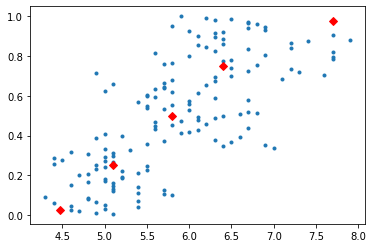

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

import matplotlib.pyplot as plt
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers,marker = '.',linestyle = 'none')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

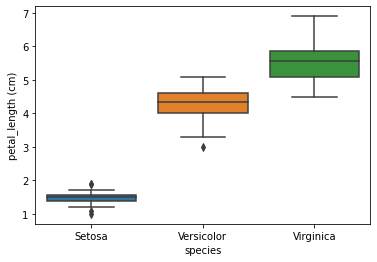

In [11]:
import seaborn as sns
import pandas as pd
iris = pd.read_csv('iris.csv')

# Create box plot with Seaborn's default settings
_= sns.boxplot(x = 'variety', y = 'petal.length', data = iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal_length (cm)')

# Show the plot
plt.show()


### Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.

In [12]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.6811222222222223 0.6811222222222223


### The standard deviation and the variance
As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

In [13]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.8253012917851409
0.8253012917851409


### Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

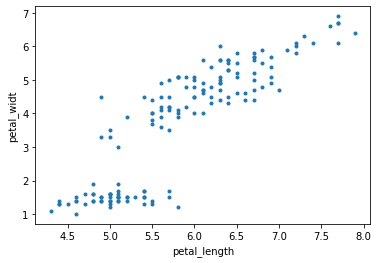

In [15]:
iris = datasets.load_iris()
versicolor_petal_length = iris.data[:, :1]
virginica_petal_length = iris.data[:, 1:2]
setosa_petal_length = iris.data[:,2:3]

# Make a scatter plot
plt.plot(versicolor_petal_length, setosa_petal_length, marker= '.', linestyle = 'none' )


# Label the axes
plt.xlabel('petal_length')
plt.ylabel('petal_widt')

# Show the result
plt.show()